In [1]:
!pip install speciesnet


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from IPython.display import display, JSON 
from PIL import ImageDraw, ImageFont 

from speciesnet import DEFAULT_MODEL
from speciesnet import draw_bboxes 
from speciesnet import load_rgb_image
from speciesnet import SpeciesNet

c:\Users\ACER NITRO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def print_predictions(predictions_dict: dict) -> None:
    print("Predictions:")
    for prediction in predictions_dict["predictions"]:
        print(prediction["filepath"], "=>", prediction["prediction"])

In [4]:
model = SpeciesNet(DEFAULT_MODEL)

In [5]:
predictions_dict = model.predict(
    instances_dict={
        "instances": [
            {
                "filepath": "D:\Fiv\Reuse Science Data\gjfdig.jpg"
            }
            
        ]
    }
)

display(JSON(predictions_dict))

WARNING  NMS time limit 0.550s exceeded


<IPython.core.display.JSON object>

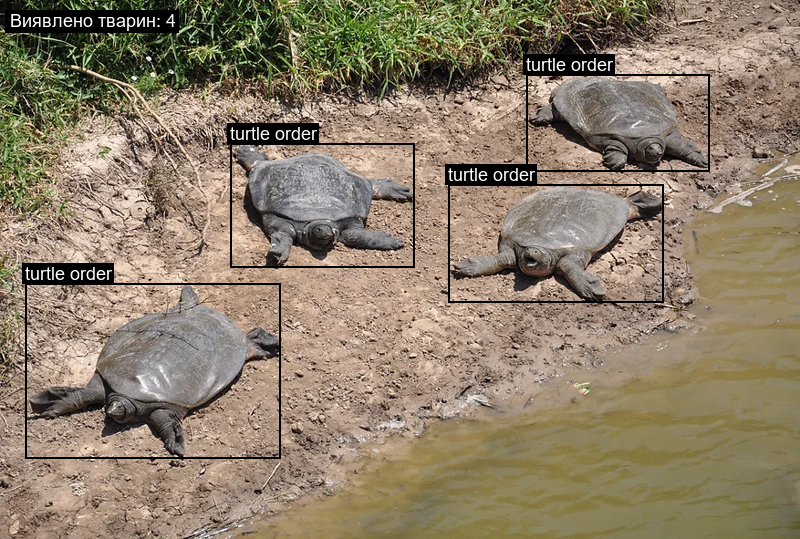

In [7]:
first_prediction_item = predictions_dict["predictions"][0]

img_filepath = first_prediction_item["filepath"]
img = load_rgb_image(img_filepath)
original_width, original_height = img.size
img.thumbnail(size=(800, 800)) 
resized_width, resized_height = img.size

raw_species_prediction = first_prediction_item.get("prediction")
species_name = raw_species_prediction.split(';')[-1] if raw_species_prediction else "Unknown"

detections = first_prediction_item.get("detections", [])

font = ImageFont.truetype("arial.ttf", 18)

draw = ImageDraw.Draw(img)

num_animals_array = []

for det in detections:
    detection_confidence = det['conf']
    x_min_norm, y_min_norm, width_norm, height_norm = det['bbox']

    x_min_orig = int(x_min_norm * original_width)
    y_min_orig = int(y_min_norm * original_height)
    x_max_orig = int((x_min_norm + width_norm) * original_width)
    y_max_orig = int((y_min_norm + height_norm) * original_height)

    x1 = int(x_min_orig * (resized_width / original_width))
    y1 = int(y_min_orig * (resized_height / original_height))
    x2 = int(x_max_orig * (resized_width / original_width))
    y2 = int(y_max_orig * (resized_height / original_height))

    if detection_confidence >= 0.6:
        num_animals_array.append(det['conf'])
        num_animals = len(num_animals_array)
        
        draw.rectangle([(x1, y1), (x2, y2)], outline="black", width=2)

        label_text = f"{species_name}"

        bbox_text = draw.textbbox((0,0), label_text, font=font) 
        text_width = bbox_text[2] - bbox_text[0]
        text_height = bbox_text[3] - bbox_text[1]

        text_x = x1
        text_y = y1 - 20 

        if text_y < 0:
            text_y = y1 + 5 

        bg_rect_x1 = text_x - 3
        bg_rect_y1 = text_y
        bg_rect_x2 = text_x + text_width 
        bg_rect_y2 = text_y + text_height + 7
        
        draw.rectangle([(bg_rect_x1, bg_rect_y1), (bg_rect_x2, bg_rect_y2)], fill="black")

        draw.text((text_x, text_y), label_text, fill="white", font=font)

        count_text = f"Виявлено тварин: {num_animals}"
        count_text_x = 10
        count_text_y = 10

        bbox_count_text = draw.textbbox((0,0), count_text, font=font)
        count_text_width = bbox_count_text[2] - bbox_count_text[0]
        count_text_height = bbox_count_text[3] - bbox_count_text[1]

        count_bg_rect_x1 = count_text_x - 5
        count_bg_rect_y1 = count_text_y
        count_bg_rect_x2 = count_text_x + count_text_width + 2
        count_bg_rect_y2 = count_text_y + count_text_height + 5

        draw.rectangle([(count_bg_rect_x1, count_bg_rect_y1), (count_bg_rect_x2, count_bg_rect_y2)], fill="black")

        draw.text((count_text_x, count_text_y), count_text, fill="white", font=font)


display(img)